<a href="https://colab.research.google.com/github/segnig/African-Credit-Scoring-Challenge/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# File loading

In [2]:
FILE_PATH = "/content/drive/MyDrive/Data Science/african-credit-scoring-challenge20241203-14702-1yayxml/"



## Importing libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")

### Load data to dataframe

In [4]:
train = pd.read_csv(FILE_PATH + "Train.csv")
test = pd.read_csv(FILE_PATH + "Test.csv")

ss = pd.read_csv(FILE_PATH + "SampleSubmission.csv")

## Train DataFrame

In [5]:
train.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


In [6]:
# dataset informations
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

In [7]:
train["target"].value_counts()

,count
target,
0,67396
1,1258


In [8]:
# numbers of values per features

for col in train.columns:
    print(f"{col}: {train[col].nunique()}")

ID: 68654
customer_id: 6540
country_id: 1
tbl_loan_id: 66520
lender_id: 4
loan_type: 22
Total_Amount: 19076
Total_Amount_to_Repay: 21920
disbursement_date: 768
due_date: 893
duration: 64
New_versus_Repeat: 2
Amount_Funded_By_Lender: 23391
Lender_portion_Funded: 12844
Lender_portion_to_be_repaid: 9791
target: 2


In [9]:
# dropped features
dropped_features = ["country_id"]

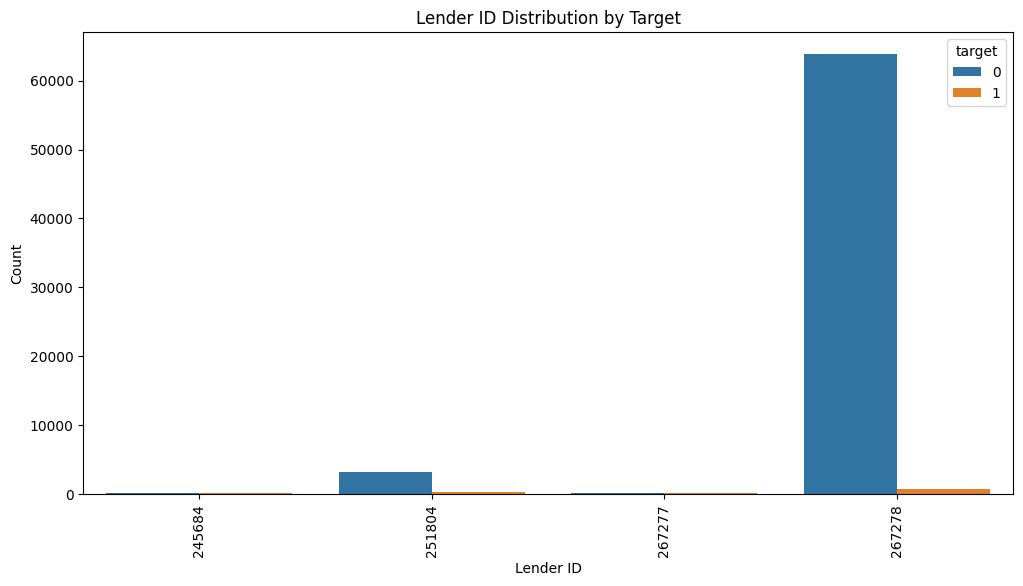

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(
    data=train,
    x="lender_id",
    hue="target",
    ax=ax
)

plt.xticks(rotation=90)
plt.xlabel("Lender ID")
plt.ylabel("Count")
plt.title("Lender ID Distribution by Target")

plt.show()

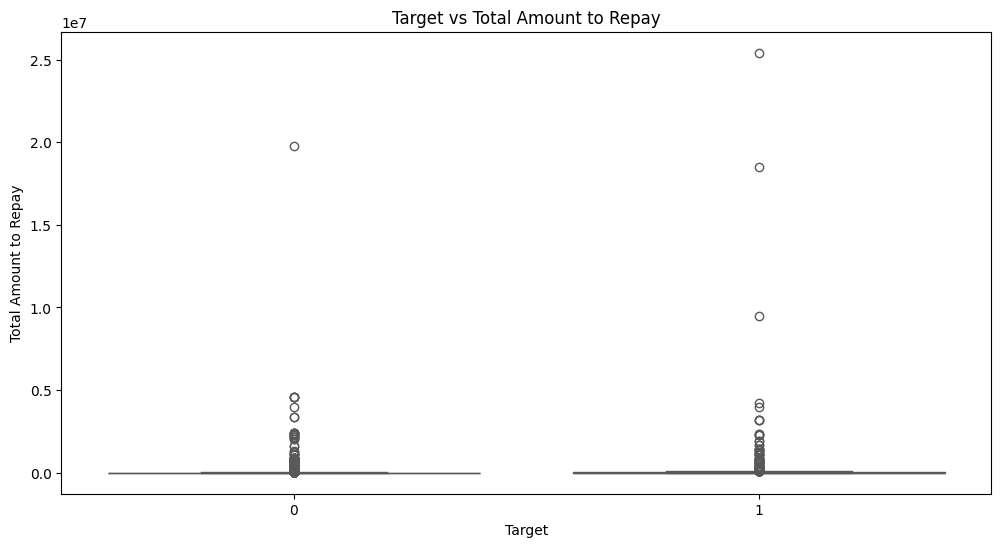

In [26]:
# Target vd 'Total_Amount_to_Repay' box'plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    data=train,
    x="target",
    y="Total_Amount_to_Repay",
    ax=ax,
    palette="Set2"
)

plt.xlabel("Target")
plt.ylabel("Total Amount to Repay")
plt.title("Target vs Total Amount to Repay")

plt.show();


In [30]:
triangle_corr = train.select_dtypes("number").corr()
triangle_corr

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
customer_id,1.000000,0.241670,-0.094086,0.000880,0.001162,-0.005274,-0.004126,-0.031184,-0.003058,0.030659
tbl_loan_id,0.241670,1.000000,-0.099092,0.016275,0.015313,0.059921,0.004764,-0.213029,0.009076,0.035068
lender_id,-0.094086,-0.099092,1.000000,-0.064935,-0.062589,-0.206143,-0.074546,-0.016221,-0.074143,-0.166202
Total_Amount,0.000880,0.016275,-0.064935,1.000000,0.996759,0.354523,0.420987,-0.038000,0.426856,0.086043
Total_Amount_to_Repay,0.001162,0.015313,-0.062589,0.996759,1.000000,0.371108,0.410123,-0.036009,0.418614,0.087089
duration,-0.005274,0.059921,-0.206143,0.354523,0.371108,1.000000,0.364851,-0.019972,0.394855,0.189889
Amount_Funded_By_Lender,-0.004126,0.004764,-0.074546,0.420987,0.410123,0.364851,1.000000,0.093573,0.997542,0.101845
Lender_portion_Funded,-0.031184,-0.213029,-0.016221,-0.038000,-0.036009,-0.019972,0.093573,1.000000,0.085730,0.045418
Lender_portion_to_be_repaid,-0.003058,0.009076,-0.074143,0.426856,0.418614,0.394855,0.997542,0.085730,1.000000,0.109517
target,0.030659,0.035068,-0.166202,0.086043,0.087089,0.189889,0.101845,0.045418,0.109517,1.000000


<Axes: >

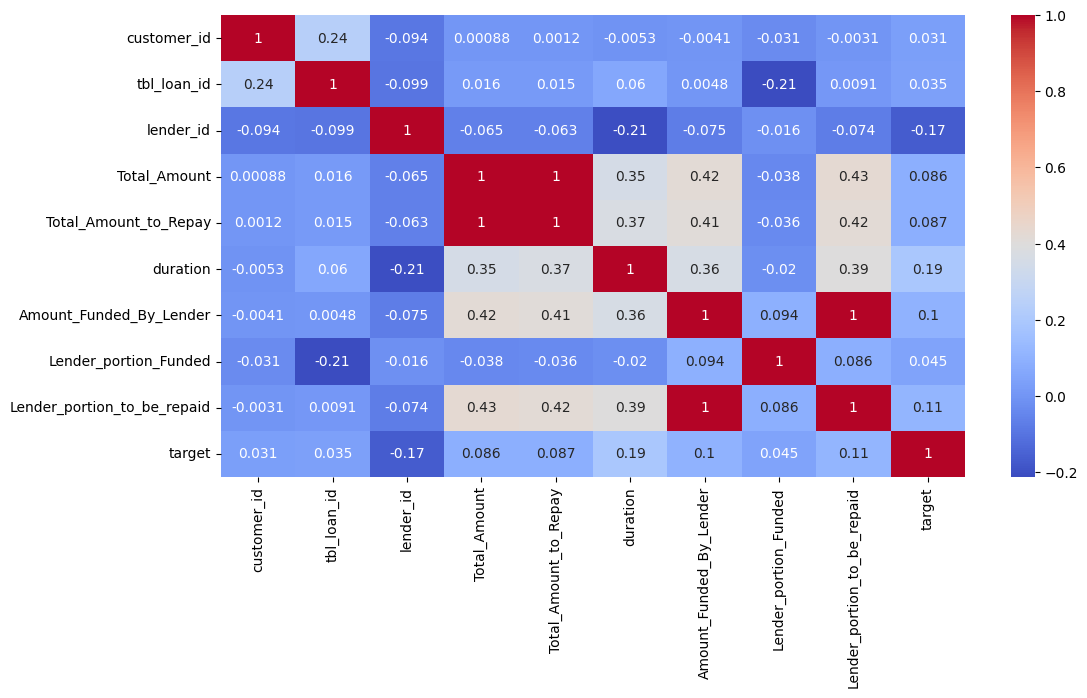

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(triangle_corr, annot=True, cmap="coolwarm")